Enter n, where n > 0
6
Enter l, where 0 <= l <= n-1
4
Enter m, where -l <= m <= l
2


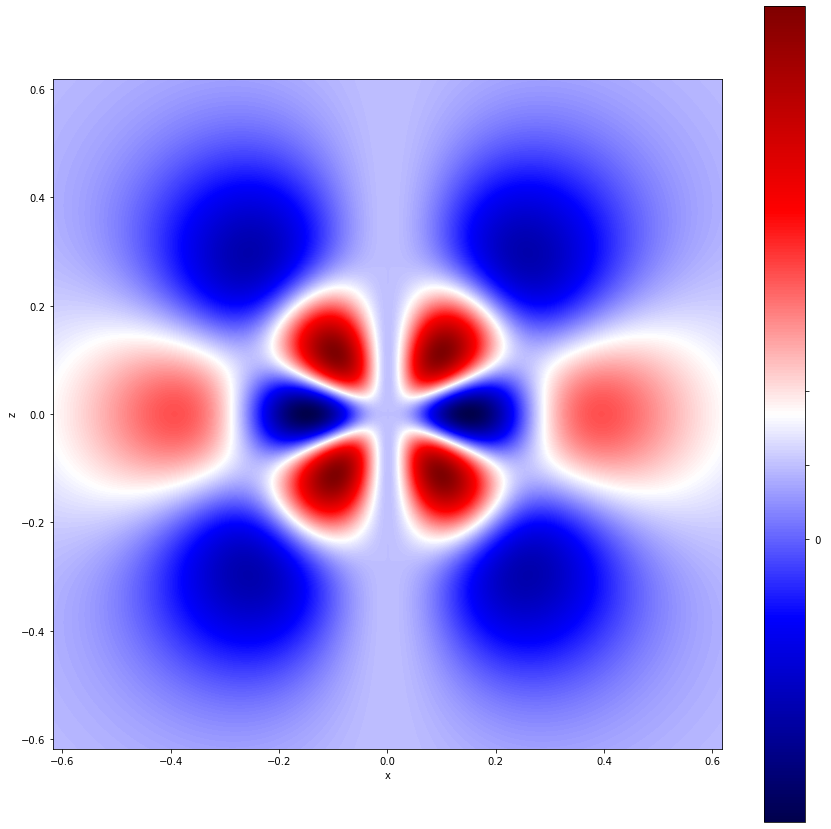

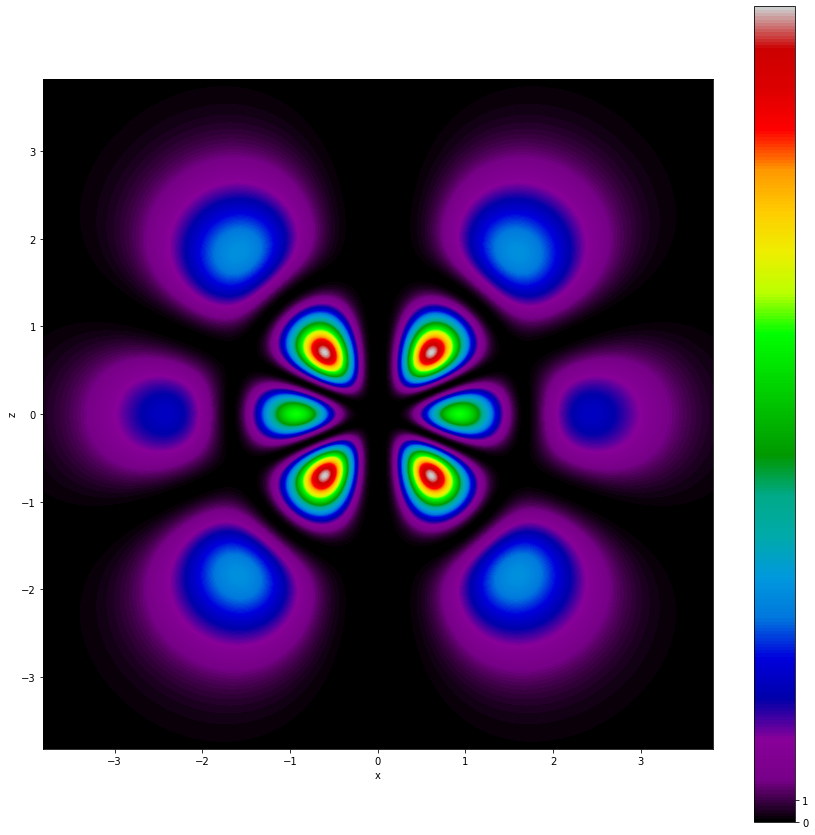

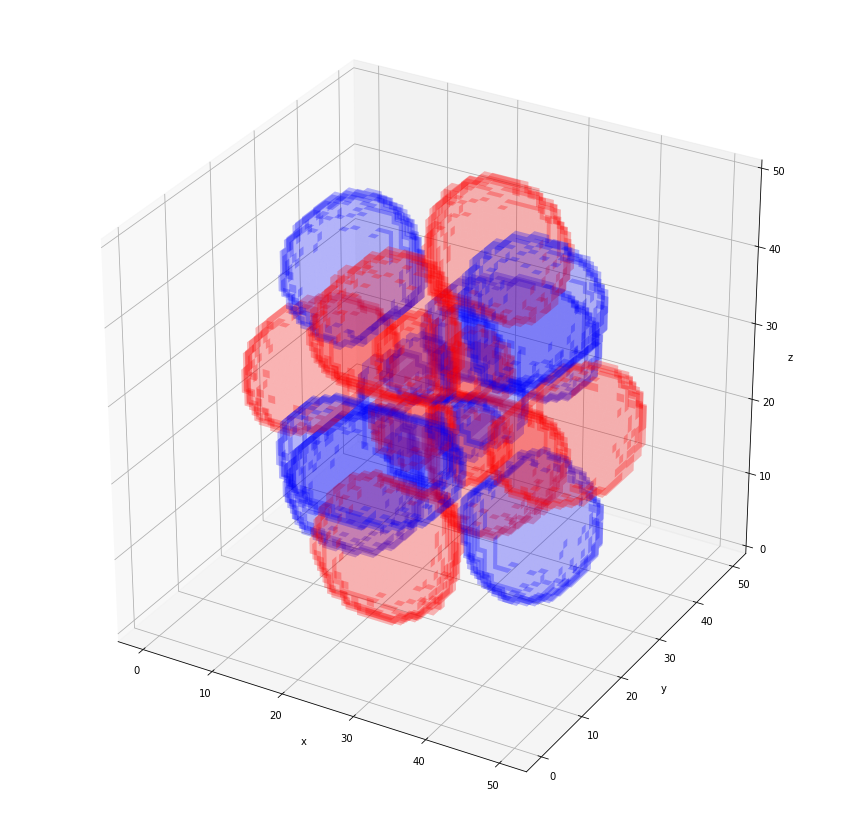

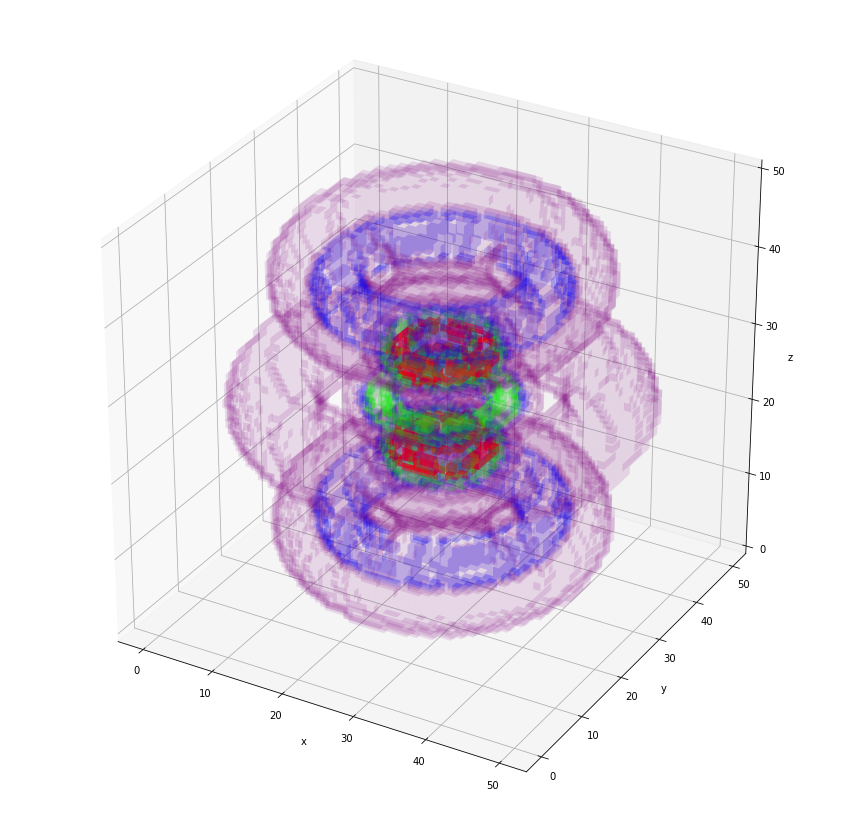

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import assoc_laguerre
from mpl_toolkits.mplot3d import Axes3D

#Defining the functions
def Ylm(m, l, theta, phi):
    return sph_harm(m, l, theta, phi)

def Laguerre(n, l, r, a):
    return assoc_laguerre(2*r/(a*n), n-l-1, 2*l+1)

def Psi(n, l, m, r, theta, phi, a):
    return np.sqrt( (2/(n*a))**3 * np.math.factorial(n-l-1) / (2*n*(n+1))) * np.exp(-r/(n*a)) * (2*r/(n*a))**l * Ylm(m, l, theta, phi) * Laguerre(n, l, r, a)

def Probability(n, l, m, r, theta, phi, a):
    #probability = (the conjugate of psi)*(psi)
    probability = np.conjugate(Psi(n, l, m, r, theta, phi, a)) * Psi(n, l, m, r, theta, phi, a)
    probability = probability.real
    return probability

def R(x, y, z):
    return np.linalg.norm((x,y,z), axis = 0)

def Theta(x, y, z):
    return np.arctan2(y, x)

def Phi(x, y, z):
    return np.arctan2(np.linalg.norm((x,y), axis=0), z)

def P(n, l, m, x, y, z, a):
    t = 30/(n**2)
    return Probability(n, l, m, R((x-25)/t, (y-25)/t, (z-25)/t), Theta((x-25)/t, (y-25)/t, (z-25)/t), Phi((x-25)/t, (y-25)/t, (z-25)/t), a)

def Psi_3D(n, l, m, x, y, z, a):
    t = 25/(n**2)
    return Psi(n, l, m, R((x-25)/t, (y-25)/t, (z-25)/t), Theta((x-25)/t, (y-25)/t, (z-25)/t), Phi((x-25)/t, (y-25)/t, (z-25)/t), a)


n = -1.234 #just a number chosen casually
while(n < 0 or l < 0 or l > n-1 or m < -l or m > l):
    if(n != -1.234):
        print("Pleas enter n again; the previous one was wrong.")
    n = int(input("Enter n, where n > 0\n"))
    l = int(input("Enter l, where 0 <= l <= n-1\n"))
    m = int(input("Enter m, where -l <= m <= l\n"))

#2D wave function
#Setting the positions
x = np.linspace(-n**2, n**2, 1000)
y = 0
z = np.linspace(-n**2, n**2, 1000)
[X, Z] = np.meshgrid(x, z)
#cartesian to spherical 
r = R(X, y, Z)
theta = Theta(x, y, z)
phi = Phi(X, y, Z)
a = 0.529
psi = Psi(n, l, m, r, theta, phi, a).real

fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel("x")
ax.set_ylabel("z")
cax = ax.imshow(psi, extent=[-psi.max()*0.1, psi.max()*0.1, -psi.max()*0.1, psi.max()*0.1],cmap = plt.cm.seismic)
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels([' 0 '])  #colorbar
plt.show()

#PDF
probability = Probability(n, l, m, r, theta, phi, a)

fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlabel("x")
ax.set_ylabel("z")
cax = ax.imshow(probability, extent=[-probability.max()*0.1, probability.max()*0.1, -probability.max()*0.1, probability.max()*0.1], cmap = plt.cm.nipy_spectral)
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])

plt.show()

#3D wave function
x, y, z = np.indices((50, 50, 50))
min_p = psi.min()
max_p = abs(psi.max())

#Coloring 
cube1 = (Psi_3D(n, l, m, x, y, z, a) > max_p*0.1)
cube2 = (Psi_3D(n, l, m, x, y, z, a) < -max_p*0.1)
voxels = cube1 | cube2 
colors = np.empty(voxels.shape, dtype=object)
colors[cube1] = '#FF000026'
colors[cube2] = '#0000FF26'

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors , shade = False)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

#3D, the PMF
x, y, z = np.indices((50, 50, 50))
min_p = probability.min()
max_p = probability.max()
cube1 = (P(n, l, m, x, y, z, a) > max_p*0.05)& (P(n, l, m, x, y, z, a) < max_p*0.19)
cube2 = (P(n, l, m, x, y, z, a) > max_p*0.21)& (P(n, l, m, x, y, z, a) < max_p*0.3)
cube3 = (P(n, l, m, x, y, z, a) > max_p*0.4)& (P(n, l, m, x, y, z, a) < max_p*0.6)
cube4 = (P(n, l, m, x, y, z, a) > max_p * 0.7)

voxels = cube1 | cube2 | cube3 | cube4
colors = np.empty(voxels.shape, dtype=object)
colors[cube1] = '#80008010'
colors[cube2] = '#0000FF26'
colors[cube3] = '#00FF0033'
colors[cube4] = '#FF000099'
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors , shade = False)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()